# Lab assignment: classifying digits with Deep Networks

<img src="img/mnist.jpeg" style="width:480px;">

In this assignment we will face the problem of recognizing handwritten digits. We will see how in order to achieve maximum effectiveness we will need to resort to several Deep Learning techniques.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below, or in a different file as instructed.</td></tr>
 <tr><td><img src="img/exclamation.png" style="width:80px;height:80px;"></td><td>This is a hint or useful observation that can help you solve this assignment. You are not expected to write any solution, but you should pay attention to them to understand the assignment.</td></tr>
 <tr><td><img src="img/pro.png" style="width:80px;height:80px;"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **keras**
* **matplotlib**

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## The Keras library

In this lab we will make use of the <a href=http://keras.io/>keras</a> Deep Learning library for Python. This library allows building several kinds of shallow and deep networks, following either a sequential or a graph architecture.

## Data loading

The handwritten digits recognition problem we will face is already included as a testbed in keras. Loading it only requires invoking

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


The loaded **X** variables are made up of the handwritten digits to classify, while the **y** variables contain the labels of the corresponding X images, telling the digits such images represent. We will use the **train** data to build our neural network, while we will use the **test** data to measure the performance of such network on an independent dataset.

We can check how many images we have for training and testing as follows:

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

Also we can take a look at the shape, width and height in pixels, of an image:

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_test[0].shape

(28, 28)

We can also visualize the images we are working with by means of using the matplotlib library. Here we are taking the first training image and painting it with a grayscale colormap. Also we are printing the corresponding class value, to ensure the labeling of the digit is correct.

Digit class: 5


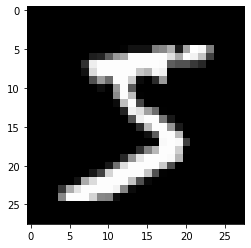

In [7]:
plt.imshow(X_train[0], 'gray')
print("Digit class:", y_train[0])

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Use the cell below to plot some other image in the training dataset, along with its corresponding digit class number. Can you find any hard to identify digit?
 </td></tr>
</table>

Digit class: 3


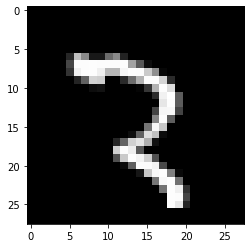

In [8]:
plt.imshow(X_train[500], 'gray')
print("Digit class:", y_train[500])

#I think this number is not completed. Confuse between 2 and 3.

Before starting building networks we should always normalize our data. This usually means substracting the mean from each variable and then dividing by the standard deviation. However in grayscale images like the ones we are working with all variables represent pixel intensities, and are bound to integers in the range [0, 255]. We can thus perform a simple initialization by just compressing this range to [0, 1]. We should also transform the data to real numbers (float) while performing this operation:

In [9]:
X_train = X_train.astype('float32') / 255

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Perform the same normalization for the test data
 </td></tr>
</table>

In [10]:
X_test = X_test.astype('float32') / 255

As for the outputs, normalization as such is not required, but we should change the class encoding to something more akin to neural networks. Instead of having a single integer ranging [0,9] to encode the different classes, we will use a <a href=https://en.wikipedia.org/wiki/One-hot>one-hot vector encoding</a>

In [11]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10) # We have 10 classes to codify

Let's check that the transformation was correct:

In [12]:
print(Y_train[0]) #this is the number 5 (0,1,2,3,4,5)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Repeat the same encoding for the classes of the test data
 </td></tr>
</table>

In [13]:
Y_test = np_utils.to_categorical(y_test, 10)

## Perceptron network

Let's start trying to solve the problem with the simplest neural network: a Perceptron. This means a neural network with no hidden layers, just some weights going from input to output.

### Defining the network

Building a network in Keras begins by choosing the type of architecture. We can either decide to build a **Sequential** network, where each layer is followed by another one in a chain, or a **Graph** network, where divergences and loops of layers can take place. In this practice we will restrict ourselves to the Sequential architecture. We can initialize a Sequential network with

In [14]:
from keras.models import Sequential
model = Sequential()

Once the network has been initialized this way, we just need to iteratively add the desired layers. For the perceptron network we only require a "classic" layer of weights from input to output. Such layer is name **Dense** in Keras.

In [15]:
from keras.layers.core import Dense

Usually creating a dense layer only involves specifying the number of outputs units of such layer. But since this will be the first layer in the network we also need to specify the number of inputs. Our inputs are images of 28x28 pixels, which makes 784 input values. As for the outputs, we have 10 classes in our problem, so that makes 10 output units.

In [16]:
denselayer = Dense(10, input_shape=(784,))

Now we add the layer to network

In [17]:
model.add(denselayer)

With this we have declared the layer of weights from inputs to outputs. Since we are facing a classification problem we should also add an activation function to the output units that enforces the output values to the range [0,1]. We will choose a softmax activation for doing so:

In [18]:
from keras.layers.core import Activation
model.add(Activation('softmax'))

With this the definition of our network is completed. We can get a text description of the network by calling

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compiling the network

After defining the network architecture the next step involves compiling the network. Compilation is an automatic process that transforms the network definition into an equivalent symbolic formulation for which derivatives can be computed, thus allowing learning through backpropagation. The only input required in this process is choosing the loss function the network should minimize, and the optimizer used for learning.

For our current network we will use **categorical crossentropy** as the loss function, as it is suitable for multiclass classification problems. As for the optimizer, we will use **Stochastic Gradient Descent**. We will also include the **classification accuracy** as a metric to measure the performance of our model.

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training the network

We are now almost ready to adjust the network parameters through training over our data. There is only one small detail left: our data is in the form of bidimensional images, while a perceptron only understands training patterns as one-dimensional vectors of data. We should then transform the data to vector form to input it into the network, something we can do with the **reshape** method of the data:

In [21]:
trainvectors = X_train.reshape(60000, 784)

We can check now that our training data has become a matrix of 60000 training patterns (rows) and 784 variables (pixels) per pattern:

In [22]:
trainvectors.shape

(60000, 784)

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Perform a similar transformation for the X_test data, saving the reshaped data into a variable named *testvectors*. Note that the number of pattens in the test data is different from the number of patterns in the training data.
 </td></tr>
</table>

In [23]:
testvectors = X_test.reshape(10000, 784)
testvectors.shape

(10000, 784)

Now we can invoke the **fit** method of the network, which will perform the training process. It is done as follows

In [24]:
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
 - 2s - loss: 1.2739 - accuracy: 0.7008
Epoch 2/20
 - 2s - loss: 0.7174 - accuracy: 0.8371
Epoch 3/20
 - 2s - loss: 0.5884 - accuracy: 0.8585
Epoch 4/20
 - 2s - loss: 0.5266 - accuracy: 0.8683
Epoch 5/20
 - 2s - loss: 0.4888 - accuracy: 0.8755
Epoch 6/20
 - 2s - loss: 0.4628 - accuracy: 0.8804
Epoch 7/20
 - 4s - loss: 0.4436 - accuracy: 0.8835
Epoch 8/20
 - 4s - loss: 0.4286 - accuracy: 0.8864
Epoch 9/20
 - 2s - loss: 0.4165 - accuracy: 0.8891
Epoch 10/20
 - 1s - loss: 0.4065 - accuracy: 0.8910
Epoch 11/20
 - 2s - loss: 0.3980 - accuracy: 0.8927
Epoch 12/20
 - 4s - loss: 0.3907 - accuracy: 0.8942
Epoch 13/20
 - 4s - loss: 0.3843 - accuracy: 0.8957
Epoch 14/20
 - 2s - loss: 0.3786 - accuracy: 0.8972
Epoch 15/20
 - 3s - loss: 0.3736 - accuracy: 0.8979
Epoch 16/20
 - 3s - loss: 0.3690 - accuracy: 0.8990
Epoch 17/20
 - 2s - loss: 0.3649 - accuracy: 0.8998
Epoch 18/20
 - 2s - loss: 0.3612 - accuracy: 0.9007
Epoch 19/20
 - 3s - loss: 0.3577 - accuracy: 0.9010
Epoch 20/20
 - 3s - l

Now that our neural network model is trained, we can obtain class predictions for the test set as follows:

In [25]:
preds = model.predict_classes(testvectors)

So for instance, the first image in the test set and its predicted class are

Real class 7 predicted class 7


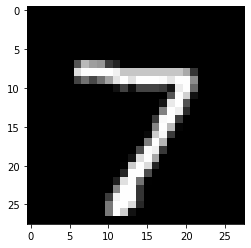

In [26]:
plt.imshow(X_test[0], 'gray')
print("Real class", y_test[0], "predicted class", preds[0])

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compare the predicted and real classes for other images in the test set. Can you find any error?
 </td></tr>
</table>

Real class 5 predicted class 6


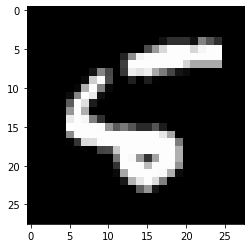

In [27]:
plt.imshow(X_test[8], 'gray')
print("Real class", y_test[8], "predicted class", preds[8])

## Ooooops!  :-)

<table>
 <tr><td><img src="img/exclamation.png" style="width:80px;height:80px;"></td><td>
You can spot all the errors in an automated way by comparing *y_test* against *preds* and getting the indexes of the mismatching elements. The function <a href=http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html>np.where</a> might also help.
 </td></tr>
</table>

An overall accuracy measure can also be obtained by means of the **evaluate** method of the model

In [28]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 0s 37us/step
Test loss 0.3358705408811569
Test accuracy 0.909500002861023


<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Do you think the level of accuracy obtained is good enough for a real application? Suppose that every time a single digit is misclasified a package might be sent to the wrong address, and ZIP codes in the USA are made of 9 digits. What is the probability of sending a package to a wrong address?
 </td></tr>
</table>

In [29]:
prob = 9*0.1*0.9*0.9*0.9*0.9*0.9*0.9*0.9*0.9
print("Wrong address probability: ",prob*100,"%")

Wrong address probability:  38.742048900000015 %


I think it is a fairly high probability. The machine would fail approximately one out of every 3 shipments.

We need a better accuracy changing the struct of the network or increasing the epoch.

## Multilayer Perceptron

A potential way to attain further improvements might be to create a deeper network, by adding layers of hidden units. This is easy to do in Keras, just by defining a new architecture with several Dense layers. For example, to build a network with a hidden layer of 10 units with sigmoid activation we would write:

In [30]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

So we have the model

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compile the defined network and train it with the data. Then measure the accuracy over the test data. Have you managed to get any improvement over the previous Perceptron model?
 </td></tr>
</table>

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

preds = model.predict_classes(testvectors)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
 - 1s - loss: 2.2398 - accuracy: 0.1793
Epoch 2/20
 - 2s - loss: 2.0097 - accuracy: 0.5265
Epoch 3/20
 - 3s - loss: 1.8252 - accuracy: 0.6399
Epoch 4/20
 - 1s - loss: 1.6626 - accuracy: 0.6849
Epoch 5/20
 - 3s - loss: 1.5176 - accuracy: 0.7175
Epoch 6/20
 - 2s - loss: 1.3889 - accuracy: 0.7442
Epoch 7/20
 - 1s - loss: 1.2756 - accuracy: 0.7682
Epoch 8/20
 - 1s - loss: 1.1765 - accuracy: 0.7879
Epoch 9/20
 - 1s - loss: 1.0899 - accuracy: 0.8007
Epoch 10/20
 - 1s - loss: 1.0144 - accuracy: 0.8124
Epoch 11/20
 - 1s - loss: 0.9485 - accuracy: 0.8219
Epoch 12/20
 - 1s - loss: 0.8911 - accuracy: 0.8292
Epoch 13/20
 - 1s - loss: 0.8407 - accuracy: 0.8358
Epoch 14/20
 - 1s - loss: 0.7964 - accuracy: 0.8418
Epoch 15/20
 - 1s - loss: 0.7573 - accuracy: 0.8474
Epoch 16/20
 - 1s - loss: 0.7227 - accuracy: 0.8515
Epoch 17/20
 - 1s - loss: 0.6919 - accuracy: 0.8558
Epoch 18/20
 - 1s - loss: 0.6644 - accuracy: 0.8598
Epoch 19/20
 - 1s - loss: 0.6399 - accuracy: 0.8628
Epoch 20/20
 - 1s - l

A somewhat worse result has been obtained than the previous one, that may be why the data is randomly chosen in learning.
If we train again and model, we can see that we have a different precision.

Real class 5 predicted class 6


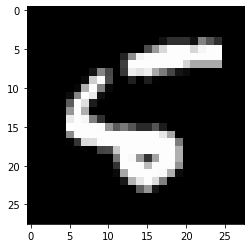

In [33]:
plt.imshow(X_test[8], 'gray')
print("Real class", y_test[8], "predicted class", preds[8])

### Fail again :-(

In [34]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 0s 42us/step
Test loss 0.5911996202468872
Test accuracy 0.8736000061035156


In [35]:
prob = 9*(1-0.89)*0.89*0.89*0.89*0.89*0.89*0.89*0.89*0.89
print("Wrong address probability: ",prob*100,"%")

Wrong address probability:  38.972229176450604 %


The probability is a bit worse.

### Fine tuning the network design

To improve the performance of the multilayer perceptron we will use the following:
* Increase the number of hidden units
* Use a better activation function: rectified linear
* Use a better optimizer: adam

This boils down to defining the network as

In [36]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Did these changes give rise to better results?
 </td></tr>
</table>

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

preds = model.predict_classes(testvectors)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
 - 2s - loss: 0.3732 - accuracy: 0.8985
Epoch 2/20
 - 2s - loss: 0.1705 - accuracy: 0.9517
Epoch 3/20
 - 2s - loss: 0.1235 - accuracy: 0.9637
Epoch 4/20
 - 3s - loss: 0.0965 - accuracy: 0.9726
Epoch 5/20
 - 3s - loss: 0.0801 - accuracy: 0.9773
Epoch 6/20
 - 2s - loss: 0.0679 - accuracy: 0.9801
Epoch 7/20
 - 2s - loss: 0.0584 - accuracy: 0.9830
Epoch 8/20
 - 2s - loss: 0.0504 - accuracy: 0.9854
Epoch 9/20
 - 2s - loss: 0.0431 - accuracy: 0.9876
Epoch 10/20
 - 2s - loss: 0.0379 - accuracy: 0.9893
Epoch 11/20
 - 2s - loss: 0.0334 - accuracy: 0.9905
Epoch 12/20
 - 2s - loss: 0.0287 - accuracy: 0.9919
Epoch 13/20
 - 2s - loss: 0.0257 - accuracy: 0.9930
Epoch 14/20
 - 2s - loss: 0.0219 - accuracy: 0.9942
Epoch 15/20
 - 3s - loss: 0.0188 - accuracy: 0.9955
Epoch 16/20
 - 2s - loss: 0.0159 - accuracy: 0.9967
Epoch 17/20
 - 2s - loss: 0.0146 - accuracy: 0.9966
Epoch 18/20
 - 2s - loss: 0.0134 - accuracy: 0.9970
Epoch 19/20
 - 2s - loss: 0.0112 - accuracy: 0.9979
Epoch 20/20
 - 2s - l

Real class 5 predicted class 5


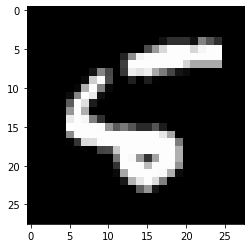

In [38]:
plt.imshow(X_test[8], 'gray')
print("Real class", y_test[8], "predicted class", preds[8])

### Bingo!! :-)

In [39]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 1s 109us/step
Test loss 0.07648511282019609
Test accuracy 0.9783999919891357


### More layers

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. How are you doing now?
 </td></tr>
</table>

In [40]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

preds = model.predict_classes(testvectors)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
 - 12s - loss: 0.2163 - accuracy: 0.9360
Epoch 2/20
 - 13s - loss: 0.0778 - accuracy: 0.9762
Epoch 3/20
 - 11s - loss: 0.0516 - accuracy: 0.9842
Epoch 4/20
 - 10s - loss: 0.0364 - accuracy: 0.9883
Epoch 5/20
 - 10s - loss: 0.0272 - accuracy: 0.9912
Epoch 6/20
 - 10s - loss: 0.0222 - accuracy: 0.9927
Epoch 7/20
 - 8s - loss: 0.0174 - accuracy: 0.9939
Epoch 8/20
 - 11s - loss: 0.0155 - accuracy: 0.9948
Epoch 9/20
 - 11s - loss: 0.0154 - accuracy: 0.9951
Epoch 10/20
 - 13s - loss: 0.0091 - accuracy: 0.9970
Epoch 11/20
 - 13s - loss: 0.0150 - accuracy: 0.9948
Epoch 12/20
 - 13s - loss: 0.0094 - accuracy: 0.9970
Epoch 13/20
 - 13s - loss: 0.0109 - accuracy: 0.9962
Epoch 14/20
 - 9s - loss: 0.0078 - accuracy: 0.9974
Epoch 15/20
 - 11s - loss: 0.0120 - accuracy: 0.9960
Epoch 16/20
 - 11s - loss: 0.0102 - accuracy: 0.9964
Epoch 17/20
 - 9s - loss: 0.0071 - accuracy: 0.9977
Epoch 18/20
 - 9s - loss: 0.0061 - accuracy: 0.9980
Epoch 19/20
 - 12s - loss: 0.0078 - accuracy: 0.9978
Epoch 

Real class 5 predicted class 5


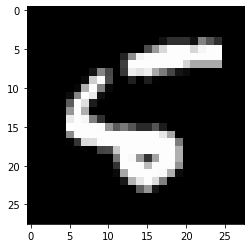

In [42]:
plt.imshow(X_test[8], 'gray')
print("Real class", y_test[8], "predicted class", preds[8])

In [43]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 1s 124us/step
Test loss 0.09381880935045912
Test accuracy 0.9840999841690063


### Introducing regularization

Regularization can help improve the performance of a network, specially when the number of network parameters becomes large and this leads to better performance in training data than in test data, which is to say, overfitting. One of the most simple and effective ways of doing so is by using **dropout**. In Keras dropout is imposed on a layer by adding a **Dropout** layer just after the activation layer in which we wish to impose regularization. For instance, to create a network with a hidden layer with a dropout of a 30% probability of dropping an input unit we would write

In [44]:
from keras.layers.core import Dropout
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

We would just need to add this layer to the model to produce the dropout effect.

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. Both hidden layers should have a Dropout of 40%. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Has dropout helped?
 </td></tr>
</table>

In [45]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))


In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

preds = model.predict_classes(testvectors)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
 - 11s - loss: 0.3005 - accuracy: 0.9084
Epoch 2/20
 - 12s - loss: 0.1337 - accuracy: 0.9587
Epoch 3/20
 - 14s - loss: 0.1016 - accuracy: 0.9685
Epoch 4/20
 - 11s - loss: 0.0855 - accuracy: 0.9730
Epoch 5/20
 - 11s - loss: 0.0742 - accuracy: 0.9765
Epoch 6/20
 - 13s - loss: 0.0662 - accuracy: 0.9787
Epoch 7/20
 - 10s - loss: 0.0618 - accuracy: 0.9798
Epoch 8/20
 - 10s - loss: 0.0540 - accuracy: 0.9830
Epoch 9/20
 - 11s - loss: 0.0511 - accuracy: 0.9835
Epoch 10/20
 - 10s - loss: 0.0479 - accuracy: 0.9840
Epoch 11/20
 - 10s - loss: 0.0446 - accuracy: 0.9855
Epoch 12/20
 - 9s - loss: 0.0413 - accuracy: 0.9865
Epoch 13/20
 - 12s - loss: 0.0394 - accuracy: 0.9871
Epoch 14/20
 - 12s - loss: 0.0391 - accuracy: 0.9873
Epoch 15/20
 - 11s - loss: 0.0356 - accuracy: 0.9879
Epoch 16/20
 - 10s - loss: 0.0351 - accuracy: 0.9890
Epoch 17/20
 - 12s - loss: 0.0322 - accuracy: 0.9898
Epoch 18/20
 - 10s - loss: 0.0333 - accuracy: 0.9894
Epoch 19/20
 - 11s - loss: 0.0302 - accuracy: 0.9900
Epo

Real class 5 predicted class 5


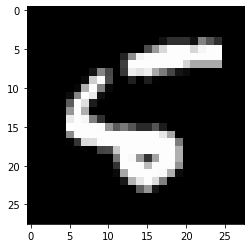

In [47]:
plt.imshow(X_test[8], 'gray')
print("Real class", y_test[8], "predicted class", preds[8])

In [48]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 1s 89us/step
Test loss 0.07598867102102613
Test accuracy 0.9822999835014343


<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Try training a network with more hidden layers. Does the performance improve in any way by doing this?
 </td></tr>
</table>

In [49]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

preds = model.predict_classes(testvectors)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
 - 12s - loss: 0.5651 - accuracy: 0.8279
Epoch 2/20
 - 11s - loss: 0.2305 - accuracy: 0.9413
Epoch 3/20
 - 12s - loss: 0.1781 - accuracy: 0.9550
Epoch 4/20
 - 10s - loss: 0.1498 - accuracy: 0.9620
Epoch 5/20
 - 11s - loss: 0.1279 - accuracy: 0.9672
Epoch 6/20
 - 9s - loss: 0.1179 - accuracy: 0.9700
Epoch 7/20
 - 11s - loss: 0.1051 - accuracy: 0.9724
Epoch 8/20
 - 9s - loss: 0.0990 - accuracy: 0.9742
Epoch 9/20
 - 10s - loss: 0.0919 - accuracy: 0.9765
Epoch 10/20
 - 10s - loss: 0.0857 - accuracy: 0.9778
Epoch 11/20
 - 11s - loss: 0.0798 - accuracy: 0.9794
Epoch 12/20
 - 12s - loss: 0.0764 - accuracy: 0.9794
Epoch 13/20
 - 13s - loss: 0.0729 - accuracy: 0.9812
Epoch 14/20
 - 10s - loss: 0.0699 - accuracy: 0.9815
Epoch 15/20
 - 11s - loss: 0.0681 - accuracy: 0.9821
Epoch 16/20
 - 12s - loss: 0.0650 - accuracy: 0.9834
Epoch 17/20
 - 11s - loss: 0.0609 - accuracy: 0.9832
Epoch 18/20
 - 12s - loss: 0.0594 - accuracy: 0.9844
Epoch 19/20
 - 12s - loss: 0.0567 - accuracy: 0.9846
Epoc

Real class 5 predicted class 5


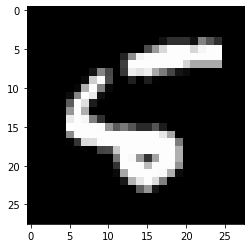

In [51]:
plt.imshow(X_test[8], 'gray')
print("Real class", y_test[8], "predicted class", preds[8])

In [52]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 1s 104us/step
Test loss 0.09240808267106432
Test accuracy 0.9807999730110168


## Convolutional Neural Networks

To further improve on this image recognition problem we need network layers that do consider the data as images, and take into account closeness of pixels to make decisions instead of just throwing all pixel data into a fully connected network and expect intelligence to emerge from chaos. **Convolutional** and **Pooling** layers are the best way to do so.

### Formatting the data as tensors

While for the perceptrons above we vectorized the data to fit into the perceptron framework, for convolutional networks we will need to shape the data in the form of a **4-dimensional tensor**. The dimensions of such tensor represent the following:
* Image index (e.g. 3th image in the dataset)
* Row index
* Column index
* Channel index (e.g. colour channel in colored images)

We again make use of the reshape function to perform this transformation. We have 60000 images in our training set, and those images have 28 rows x 28 columns. Since these images are grayscale, the channel dimension only contains one channel:

In [53]:
traintensor = X_train.reshape(60000, 28, 28, 1)

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Repeat the transformation for the test data. Save the resulting tensor in a variable named *testtensor*.
 </td></tr>
</table>

In [54]:
testtensor = X_test.reshape(10000, 28, 28, 1)

### Convolution and pooling layers

When defining a convolutional network, Convolution and Pooling layers work together. The most popular way of using these layers is in the following pattern:
* A Convolution layer with rectified linear activations
* A Pooling layer
* Dropout (if regularization wants to be enforced)

We can thus define a minimal convolutional network as

In [56]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate
                        kernel_size, kernel_size, # Size of convolution kernels
                        border_mode='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  del sys.path[0]


There is an issue, though: at some point we need to transform the tensor data into a vector, as the output of the network should be a vector of 10 values, representing class probabilities. We can do this by using a **Flatten** layer. Then we can add a standard Dense layer to produce the outputs:

In [57]:
from keras.layers.core import Flatten
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Use the tensor data you prepared above, not the vectorized data. Then measure the accuracy over the test data. Have the Convolution and MaxPooling helped?
 </td></tr>
</table>

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

preds = model.predict_classes(testtensor)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
 - 25s - loss: 0.0307 - accuracy: 0.9901
Epoch 2/20
 - 25s - loss: 0.0308 - accuracy: 0.9897
Epoch 3/20
 - 23s - loss: 0.0304 - accuracy: 0.9902
Epoch 4/20
 - 26s - loss: 0.0279 - accuracy: 0.9912
Epoch 5/20
 - 26s - loss: 0.0272 - accuracy: 0.9911
Epoch 6/20
 - 24s - loss: 0.0254 - accuracy: 0.9919
Epoch 7/20
 - 26s - loss: 0.0251 - accuracy: 0.9921
Epoch 8/20
 - 19s - loss: 0.0249 - accuracy: 0.9919
Epoch 9/20
 - 23s - loss: 0.0250 - accuracy: 0.9918
Epoch 10/20
 - 25s - loss: 0.0243 - accuracy: 0.9918
Epoch 11/20
 - 24s - loss: 0.0220 - accuracy: 0.9929
Epoch 12/20
 - 18s - loss: 0.0218 - accuracy: 0.9929
Epoch 13/20
 - 24s - loss: 0.0214 - accuracy: 0.9932
Epoch 14/20
 - 27s - loss: 0.0210 - accuracy: 0.9929
Epoch 15/20
 - 24s - loss: 0.0206 - accuracy: 0.9933
Epoch 16/20
 - 20s - loss: 0.0198 - accuracy: 0.9937
Epoch 17/20
 - 25s - loss: 0.0188 - accuracy: 0.9939
Epoch 18/20
 - 28s - loss: 0.0199 - accuracy: 0.9936
Epoch 19/20
 - 25s - loss: 0.0187 - accuracy: 0.9940
Ep

In [62]:
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 1s 110us/step
Test loss 0.05194392412010929
Test accuracy 0.9850000143051147


<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Build and train a convolutional network with the following layers:
<ul>
     <li>A Convolution layer of 32 channels, kernel size 3 and rectified linear activation</li>
     <li>Another Convolution layer of 32 channels, kernel size 3 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2</li>
     <li>A 25% Dropout</li>
     <li>A Flatten layer</li>
     <li>A Dense layer with 128 units and rectified linear activation</li>
     <li>A 50% Dropout</li>
     <li>An output Dense layer with softmax activation</li>
</ul>
Has the added complexity improved the accuracy results?    
 </td></tr>
</table>

In [63]:
img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate
                        kernel_size, kernel_size, # Size of convolution kernels
                        border_mode='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(Convolution2D(32, # Number convolution channels to generate
                        kernel_size, kernel_size, # Size of convolution kernels
                        border_mode='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  # This is added back by InteractiveShellApp.init_path()
/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  app.launch_new_instance()


In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/20
 - 37s - loss: 0.2163 - accuracy: 0.9343
Epoch 2/20
 - 42s - loss: 0.0668 - accuracy: 0.9790
Epoch 3/20
 - 26s - loss: 0.0486 - accuracy: 0.9845
Epoch 4/20
 - 40s - loss: 0.0365 - accuracy: 0.9883
Epoch 5/20
 - 45s - loss: 0.0320 - accuracy: 0.9900
Epoch 6/20
 - 46s - loss: 0.0265 - accuracy: 0.9914
Epoch 7/20
 - 46s - loss: 0.0237 - accuracy: 0.9922
Epoch 8/20
 - 44s - loss: 0.0202 - accuracy: 0.9934
Epoch 9/20
 - 44s - loss: 0.0183 - accuracy: 0.9938
Epoch 10/20
 - 44s - loss: 0.0155 - accuracy: 0.9945
Epoch 11/20
 - 42s - loss: 0.0159 - accuracy: 0.9947
Epoch 12/20
 - 55s - loss: 0.0136 - accuracy: 0.9953
Epoch 13/20
 - 48s - loss: 0.0135 - accuracy: 0.9955
Epoch 14/20
 - 43s - loss: 0.0112 - accuracy: 0.9963
Epoch 15/20
 - 43s - loss: 0.0102 - accuracy: 0.9967
Epoch 16/20
 - 42s - loss: 0.0100 - accuracy: 0.9965
Epoch 17/20
 - 43s - loss: 0.0098 - accuracy: 0.9967
Epoch 18/20
 - 43s - loss: 0.0095 - accuracy: 0.9970
Epoch 19/20
 - 29s - loss: 0.0092 - accuracy: 0.9968
Ep

In [65]:
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 2s 202us/step
Test loss 0.029928781792297382
Test accuracy 0.9926999807357788


## Final exercise: LeNet

<a href=http://yann.lecun.com/exdb/lenet/>LeNet</a> is a particular convolutional neural network definition that has proven to be quite effective. As a final exercise we will build this network and try it on our digits problem.

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Build and train a LeNet network, which is defined by the following layers:
<ul>
     <li>A Convolution layer of 20 channels, kernel size 5 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2 and stride 2 (check <a href=http://keras.io/layers/convolutional/>the docs</a>)</li>
     <li>A 25% Dropout</li>
     <li>A Convolution layer of 50 channels, kernel size 5 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2 and stride 2 (check <a href=http://keras.io/layers/convolutional/>the docs</a>)</li>
     <li>A 25% Dropout</li>
     <li>A Flatten layer</li>
     <li>A Dense layer with 500 units and rectified linear activation</li>
     <li>A 50% Dropout</li>
     <li>An output Dense layer with softmax activation</li>
</ul>
Is this the best network so far for the problem?
 </td></tr>
</table>

In [58]:
kernel_size = 5 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers
stride=2
model = Sequential()

model.add(Convolution2D(20, # Number convolution channels to generate
                        kernel_size, kernel_size, # Size of convolution kernels
                        border_mode='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size),strides=(stride,stride)))
model.add(Dropout(0.25))
model.add(Convolution2D(50, # Number convolution channels to generate
                        kernel_size, kernel_size, # Size of convolution kernels
                        border_mode='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (5, 5), input_shape=(28, 28, 1..., padding="valid")`
  if __name__ == '__main__':
/home/master/Aplicaciones/anaconda-navigator/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (5, 5), input_shape=(28, 28, 1..., padding="valid")`
  app.launch_new_instance()


<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>

## Bonus rounds

<table>
 <tr><td><img src="img/pro.png" style="width:80px;height:80px;"></td><td>
Rebuild the LeNet network with a larger number of training epochs. What is the best test error you can achieve?
 </td></tr>
</table>

<table>
 <tr><td><img src="img/pro.png" style="width:80px;height:80px;"></td><td>
If your PC has a CUDA-compatible GPU card you can take advantage of it to significanly accelerate training times. You are encouraged to configure Keras to make use of your GPU.
 </td></tr>
</table>